In [3]:
from netCDF4 import *
import matplotlib.pyplot as plt
import matplotlib.colors as co
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib as mpl
%matplotlib inline
from path import Path
import pandas as pd
import xarray as xr
import numpy as np
import math
import scipy.interpolate as interp
import scipy.stats as stats
import tkinter as tk
import os

from matplotlib import rc
font = {"family": "serif", "weight": "normal", "size": 13}
rc("font", **font)
rc("text", usetex=True)

In [4]:
def plot_turbulence_dvp(field_name,x,y):
    #Plot the evolution of ux and uy at position {x,y} (each component ranges between [0,100]) throughout the increments of the simulation
    ux_series = []
    uy_series = []  
    #the range of i must be adapted to the number of fields in the simulation
    for i in range(0,1000,5):
        if os.path.exists(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\Simulation\Submesoscale simulation\\Forcing\\"+field_name+"\\field"+str(i)) :
            path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\Simulation\Submesoscale simulation\\Forcing\\"+field_name+"\\field"+str(i)+"\\ux")
            with open(path, "r") as f:
                lines = [line.strip() for line in f if line.strip()]

                data_lines = lines[1:]
                data = [list(map(float, line.split())) for line in data_lines]
                size = int(math.sqrt(len(data)))
                ux_series.append(data[int(x*size/100) + int(y*size*size/100)][2])

            path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\Simulation\Submesoscale simulation\\Forcing\\"+field_name+"\\field"+str(i)+"\\uy")
            with open(path, "r") as f:
                lines = [line.strip() for line in f if line.strip()]

                data_lines = lines[1:]
                data = [list(map(float, line.split())) for line in data_lines]
                size = int(math.sqrt(len(data)))
                uy_series.append(data[int(x*size/100) + int(y*size*size/100)][2])
    plt.plot(ux_series)
    plt.plot(uy_series)
    plt.legend()
    return ux_series, uy_series

In [5]:
def field_exists(field_name,i):
    return os.path.exists(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\Simulation\Submesoscale simulation\\Forcing\\"+field_name+"\\field"+str(i))

In [6]:
def v_component(field_name,i):
    path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\\Simulation\\Submesoscale simulation\\Forcing\\"+field_name+"\\field"+str(i)+"\\ux")
    with open(path, "r") as f:
        lines = [line.strip() for line in f if line.strip()]
        data_lines = lines[1:]
        data = [list(map(float, line.split())) for line in data_lines]
        size = int(math.sqrt(len(data)))
        data = np.reshape(np.array(data),(size,size,3))
        ux = data[:,:,2]

    path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\\Simulation\\Submesoscale simulation\\Forcing\\"+field_name+"\\field"+str(i)+"\\uy")
    with open(path, "r") as f:
        lines = [line.strip() for line in f if line.strip()]
        data_lines = lines[1:]
        data = [list(map(float, line.split())) for line in data_lines]
        size = int(math.sqrt(len(data)))
        data = np.reshape(np.array(data),(size,size,3))
        uy = data[:,:,2]

    return np.transpose(ux), np.transpose(uy)


In [7]:
def mixing_length(ux,uy,x,y,res,lcar):
    dmax = int(lcar/res)*res
    d = np.arange(res,dmax,res)
    dv = np.arange(res,dmax,res)
    for i,l in enumerate(d):
        v = np.zeros_like(d)
        divider = 0
        if x-i >= 0 :
            v[i] += (ux[x-i,y]**2 + uy[x-i,y]**2)**0.5
            divider += 1
        if x+i < ux.shape[0] :
            v[i] += (ux[x+i,y]**2 + uy[x+i,y]**2)**0.5
            divider += 1
        if y-i >= 0 :
            v[i] += (ux[x,y-i]**2 + uy[x,y-i]**2)**0.5
            divider += 1
        if y+i < uy.shape[1] :
            v[i] += (ux[x,y+i]**2 + uy[x,y+i]**2)**0.5
            divider += 1
        dv[i] = (abs(v[i]/divider)/((ux[x,y]**2 + uy[x,y]**2)**0.5))
    return d ,dv

C:\Users\albou\AppData\Local\Temp\ipykernel_14348\3056065887.py:20: RuntimeWarning: invalid value encountered in scalar divide
  dv[i] = (abs(v[i]/divider)/((ux[x,y]**2 + uy[x,y]**2)**0.5))


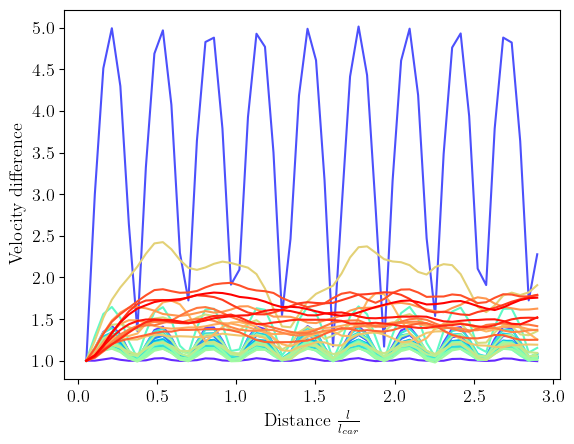

In [14]:

lcar = 40000
field="Kolmog/K25km"

trange = np.arange(0,400,10)
for t in trange:
    if not field_exists(field,t):
        continue
    ux,uy = v_component(field,t)
    dvs =[]
    for i in range(100):
        x = np.random.randint(0,ux.shape[0])
        y = np.random.randint(0,ux.shape[1])
        d, dv = mixing_length(ux,uy,x,y,550000/256,3*lcar)
        dvs.append(dv)

    plt.xlabel("Distance $\\frac{l}{l_{car}}$")
    plt.ylabel("Velocity difference")
    plt.plot(d/lcar,np.mean(dvs,0),c = mpl.cm.rainbow(t/max(trange)))
    # plt.plot(d/lcar,np.mean(dvs,0),c = (0,0,t/max(trange)))
    ax = plt.gca()
plt.show()
